In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns", None)

##Games Data

In [ ]:
all_games = pd.read_csv("/content/drive/MyDrive/Machine Learning NBA /Final Data/games_with_features.csv", index_col="id")

In [ ]:
all_games.head()

,date,home_team_score,period,postseason,season,status,visitor_team_score,home_team.id,home_team.abbreviation,home_team.conference,home_team.division,home_team.full_name,visitor_team.id,visitor_team.abbreviation,visitor_team.conference,visitor_team.division,visitor_team.full_name,winner,home_team_avg_score_historical,visitor_team_avg_score_historical,home_team_id_year,visitor_team_id_year,home_team_avg_score,visitor_team_avg_score,home_avg_score_diff,visitor_avg_score_diff
id,,,,,,,,,,,,,,,,,,,,,,,,,,
47179,2019-01-30,126,4,False,2018,Final,94,2,BOS,East,Atlantic,Boston Celtics,4,CHA,East,Southeast,Charlotte Hornets,1,105.7,98.4,2 2018,4 2018,112.8,108.3,3.620000,-3.831707
48751,2019-02-09,112,4,False,2018,Final,123,2,BOS,East,Atlantic,Boston Celtics,13,LAC,West,Pacific,LA Clippers,0,105.7,100.6,2 2018,13 2018,112.8,113.1,3.620000,0.581818
48739,2019-02-08,117,4,False,2018,Final,110,23,PHI,East,Atlantic,Philadelphia 76ers,8,DEN,West,Northwest,Denver Nuggets,1,103.2,104.2,23 2018,8 2018,117.9,108.2,8.725532,-4.670213
48740,2019-02-08,119,4,False,2018,Final,106,30,WAS,East,Southeast,Washington Wizards,6,CLE,East,Central,Cleveland Cavaliers,1,103.4,98.4,30 2018,6 2018,116.4,103.8,7.429268,-8.419512
48746,2019-02-08,102,4,False,2018,Final,96,26,SAC,West,Pacific,Sacramento Kings,16,MIA,East,Southeast,Miami Heat,1,105.5,96.1,26 2018,16 2018,114.9,105.4,5.129268,-6.670732


In [ ]:
all_seasons = np.sort(all_games["season"].unique())
all_seasons

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

###Percent of home team win

In [ ]:
n_home_wins = all_games[all_games["home_team_score"].gt(all_games["visitor_team_score"])].shape[0]  # number of games where home team won
n_games = all_games.shape[0]  # number of games
home_win_pct = round(n_home_wins/n_games, 2)

print(n_home_wins, n_games, home_win_pct, sep="\n")

30529
49995
0.61


In [ ]:
home_win_pcts = []
for season in all_seasons:
    season_games = all_games[all_games["season"].eq(season)]
    n_home_wins = season_games[season_games["home_team_score"].gt(season_games["visitor_team_score"])].shape[0]  # number of games where home team won
    n_games = season_games.shape[0]  # number of games
    home_win_pct = round(n_home_wins/n_games, 2) * 100
    home_win_pcts.append(home_win_pct)
    print(season, n_home_wins, n_games, home_win_pct)

1979 622 950 65.0
1980 612 995 62.0
1981 592 989 60.0
1982 612 986 62.0
1983 687 1022 67.0
1984 642 1011 64.0
1985 662 1010 66.0
1986 677 1014 67.0
1987 697 1023 68.0
1988 729 1087 67.0
1989 767 1179 65.0
1990 773 1175 66.0
1991 751 1180 64.0
1992 725 1183 61.0
1993 729 1184 62.0
1994 700 1178 59.0
1995 764 1257 61.0
1996 733 1261 57.99999999999999
1997 746 1252 60.0
1998 492 791 62.0
1999 775 1264 61.0
2000 752 1260 60.0
2001 744 1260 59.0
2002 800 1277 63.0
2003 789 1271 62.0
2004 791 1314 60.0
2005 802 1319 61.0
2006 778 1309 59.0
2007 803 1316 61.0
2008 805 1315 61.0
2009 786 1312 60.0
2010 797 1311 61.0
2011 637 1074 59.0
2012 806 1314 61.0
2013 764 1319 57.99999999999999
2014 755 1311 57.99999999999999
2015 782 1316 59.0
2016 763 1309 57.99999999999999
2017 770 1312 59.0
2018 774 1311 59.0
2019 623 1142 55.00000000000001
2020 311 558 56.00000000000001
2021 410 774 53.0


In [ ]:
fontdict = {'weight' :'bold', 'size' :'16'
    
}

[65.0, 62.0, 60.0, 62.0, 67.0, 64.0, 66.0, 67.0, 68.0, 67.0, 65.0, 66.0, 64.0, 61.0, 62.0, 59.0, 61.0, 57.99999999999999, 60.0, 62.0, 61.0, 60.0, 59.0, 63.0, 62.0, 60.0, 61.0, 59.0, 61.0, 61.0, 60.0, 61.0, 59.0, 61.0, 57.99999999999999, 57.99999999999999, 59.0, 57.99999999999999, 59.0, 59.0, 55.00000000000001, 56.00000000000001, 53.0, 65.0, 62.0, 60.0, 62.0, 67.0, 64.0, 66.0, 67.0, 68.0, 67.0, 65.0, 66.0, 64.0, 61.0, 62.0, 59.0, 61.0, 57.99999999999999, 60.0, 62.0, 61.0, 60.0, 59.0, 63.0, 62.0, 60.0, 61.0, 59.0, 61.0, 61.0, 60.0, 61.0, 59.0, 61.0, 57.99999999999999, 57.99999999999999, 59.0, 57.99999999999999, 59.0, 59.0, 55.00000000000001, 56.00000000000001, 53.0, 65.0, 62.0, 60.0, 62.0, 67.0, 64.0, 66.0, 67.0, 68.0, 67.0, 65.0, 66.0, 64.0, 61.0, 62.0, 59.0, 61.0, 57.99999999999999, 60.0, 62.0, 61.0, 60.0, 59.0, 63.0, 62.0, 60.0, 61.0, 59.0, 61.0, 61.0, 60.0, 61.0, 59.0, 61.0, 57.99999999999999, 57.99999999999999, 59.0, 57.99999999999999, 59.0, 59.0, 55.00000000000001, 56.0000000000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 35.89770926787756, 'Year')

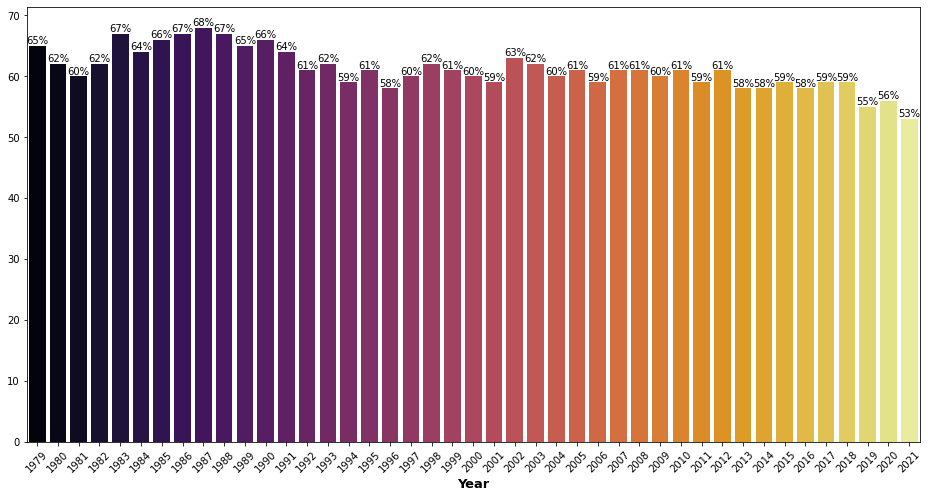

In [ ]:
y = home_win_pcts * 100
print(y)
ax = plt.figure(figsize=(16,8))
ax  = sns.barplot(all_seasons, home_win_pcts, palette = 'inferno')
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set_xticklabels(all_seasons, rotation = 45)
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Figures/Home Team Win % by Year.png")
ax.set_xlabel("Year", fontdict = {'weight' : 'bold', 'size' : 13})

##Points scores when playing at home

In [ ]:
home_avg = all_games[["home_team.full_name", "season", "home_team_avg_score"]].groupby(["home_team.full_name", "season"]).mean().values

In [ ]:
visiting_avg = all_games[["visitor_team.full_name", "season", "visitor_team_avg_score"]].groupby(["visitor_team.full_name", "season"]).mean().values

In [ ]:
avg_score_by_team = all_games[["home_team.full_name", "season", "home_team_avg_score"]].groupby(["home_team.full_name", "season"]).mean()

avg_score_by_team.columns = ["avg_score_as_home"]

avg_score_by_team["avg_score_as_home"] = home_avg
avg_score_by_team["avg_score_as_visitor"] = visiting_avg
avg_score_by_team["avg_score_mean"] = (home_avg + visiting_avg) / 2
avg_score_by_team["avg_score_diff"] = (home_avg - visiting_avg)
avg_score_by_team.reset_index(inplace=True)

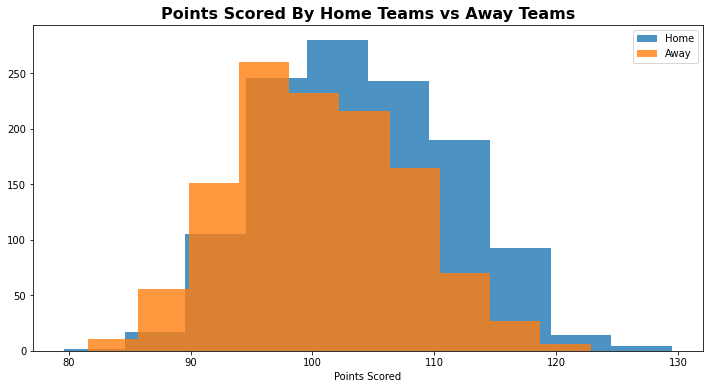

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(avg_score_by_team["avg_score_as_home"], alpha=0.8, label="Home", bins=10)
plt.hist(avg_score_by_team["avg_score_as_visitor"], alpha=0.8, label="Away", bins=10)
plt.title("Points Scored By Home Teams vs Away Teams", fontdict)
plt.xlabel("Points Scored")
plt.legend()
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Figures/Points Scored By Home Teams vs Away Teams.png")
plt.show()

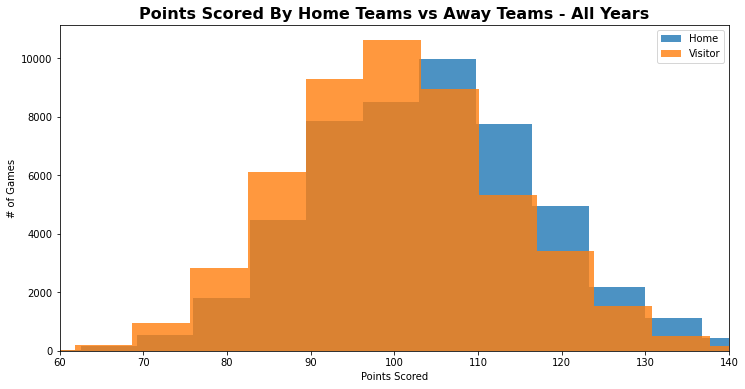

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(all_games["home_team_score"], alpha=0.8, label="Home", bins=20)
plt.hist(all_games["visitor_team_score"], alpha=0.8, label="Visitor", bins=20)
plt.xlim(60,140)
plt.title("Points Scored By Home Teams vs Away Teams - All Years", fontdict)
plt.xlabel("Points Scored")
plt.ylabel("# of Games")
plt.legend()
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Figures/Points Scored By Home Teams vs Away Teams - All Years.png")
plt.show()

In [ ]:
avg_score_by_team[avg_score_by_team["avg_score_as_home"].gt(120)]

,home_team.full_name,season,avg_score_as_home,avg_score_as_visitor,avg_score_mean,avg_score_diff
253,Dallas Mavericks,1986,120.7,112.6,116.65,8.1
290,Denver Nuggets,1980,124.7,118.9,121.80,5.8
291,Denver Nuggets,1981,129.5,122.8,126.15,6.7
292,Denver Nuggets,1982,125.5,119.9,122.70,5.6
293,Denver Nuggets,1983,126.7,120.6,123.65,6.1
294,Denver Nuggets,1984,122.8,117.8,120.30,5.0
296,Denver Nuggets,1986,122.1,110.8,116.45,11.3
298,Denver Nuggets,1988,122.5,113.2,117.85,9.3
300,Denver Nuggets,1990,120.1,119.6,119.85,0.5
385,Golden State Warriors,1989,121.4,111.2,116.30,10.2


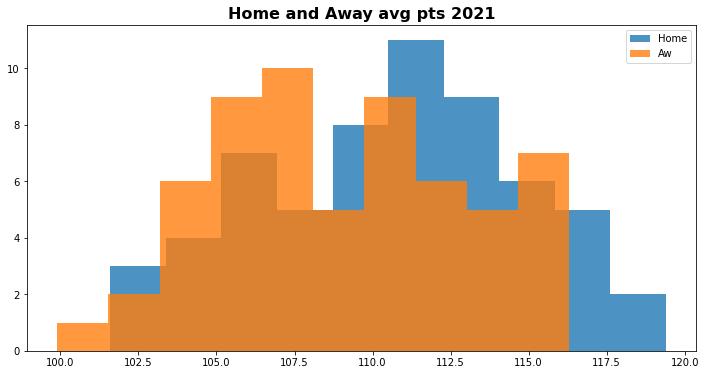

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(avg_score_by_team[avg_score_by_team["season"].isin([2019,2021])]["avg_score_as_home"], alpha=0.8, label="Home")
plt.hist(avg_score_by_team[avg_score_by_team["season"].isin([2019,2021])]["avg_score_as_visitor"], alpha=0.8, label="Aw")
plt.title("Home and Away avg pts 2021", fontdict)
plt.legend()
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Figures/Home and Away avg pts 2021.png")
plt.show()

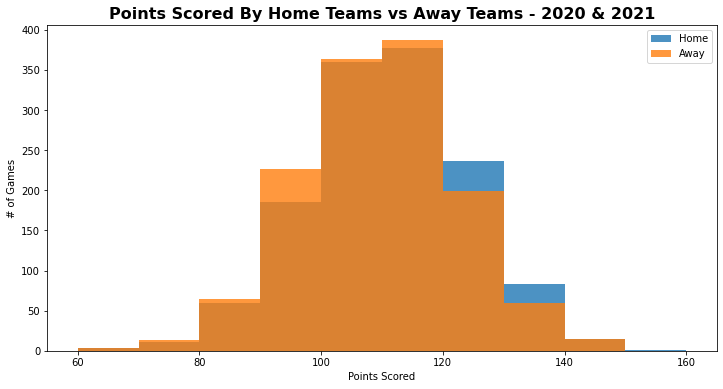

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(all_games[all_games["season"].isin([2020,2021])]["home_team_score"], alpha=0.8, label="Home", 
         bins=[60,70,80,90,100,110,120,130,140,150,160])
plt.hist(all_games[all_games["season"].isin([2020,2021])]["visitor_team_score"], alpha=0.8, label="Away",
        bins=[60,70,80,90,100,110,120,130,140,150,160])
plt.title("Points Scored By Home Teams vs Away Teams - 2020 & 2021", fontdict)
plt.xlabel("Points Scored")
plt.ylabel("# of Games")
plt.legend()
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Points Scored By Home Teams vs Away Teams - 2020 & 2021.png")
plt.show()

In [ ]:
avg_score_by_team["avg_score_diff"].mean()

3.401926298157454

In [ ]:
avg_score_by_season = all_games[["season", "home_team_avg_score", "visitor_team_avg_score"]].groupby("season").mean()
avg_score_by_season["mean_avg_score"] = (avg_score_by_season["home_team_avg_score"] + avg_score_by_season["visitor_team_avg_score"]) / 2
avg_score_by_season["diff"] = avg_score_by_season["home_team_avg_score"] - avg_score_by_season["visitor_team_avg_score"]

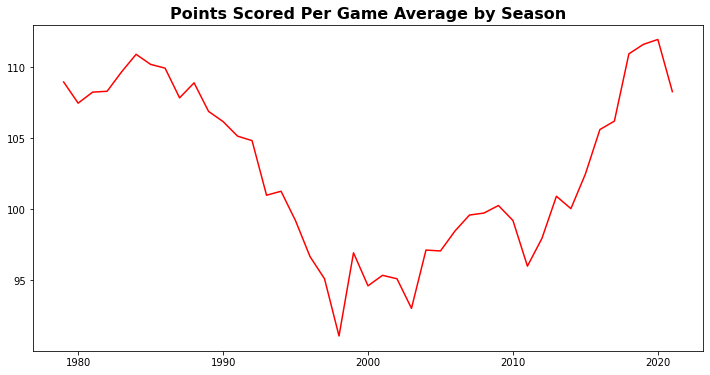

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Points Scored Per Game Average by Season", fontdict)
plt.plot(avg_score_by_season.index, avg_score_by_season["mean_avg_score"], color="red")
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Points Scored Per Game Average by Season.png")
plt.show()

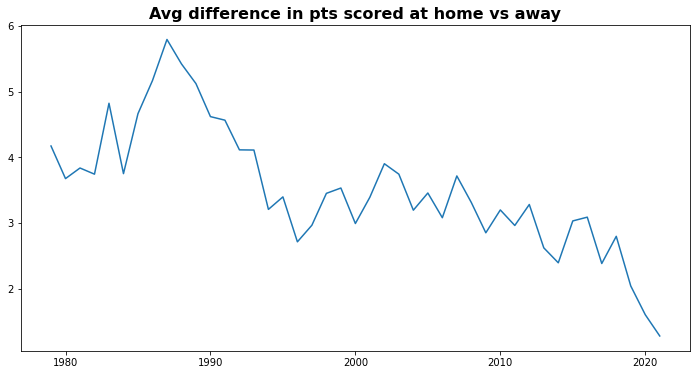

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(avg_score_by_season.index, avg_score_by_season["diff"])
plt.title("Avg difference in pts scored at home vs away", fontdict)
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Points Scored Per Game Average by Season.png")
plt.show()

##Getting Washington Stats

In [ ]:
washington_home = all_games[all_games["home_team.full_name"].eq("Washington Wizards")]
washington_away = all_games[all_games["visitor_team.full_name"].eq("Washington Wizards")]
washington = pd.concat([washington_home, washington_away])

In [ ]:
washington_home_win_pct = washington_home[["season", "winner"]].groupby("season").sum() / washington_home[["season", "winner"]].groupby("season").count()

In [ ]:
washington_away_win_pct = 1 - washington_away[["season", "winner"]].groupby("season").sum() / washington_away[["season", "winner"]].groupby("season").count()

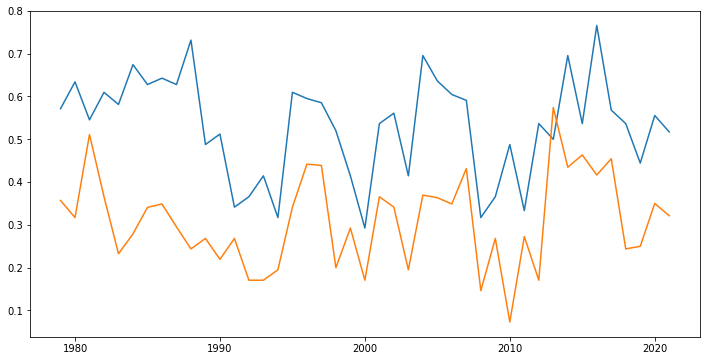

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(washington_home_win_pct)
plt.plot(washington_away_win_pct)
plt.savefig("/content/drive/MyDrive/Machine Learning NBA /Washington Game Points.png")
plt.show()

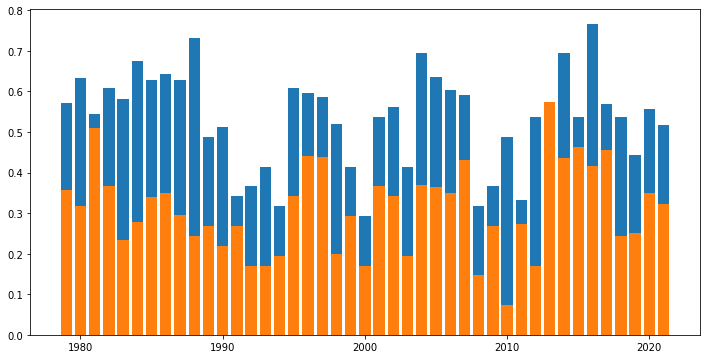

In [ ]:
plt.figure(figsize = (12,6))
plt.bar(washington_home_win_pct.index, washington_home_win_pct.winner)
plt.bar(washington_away_win_pct.index, washington_away_win_pct.winner)
plt.show()

##Stats Data

In [ ]:
stats = pd.read_csv("/content/drive/MyDrive/Machine Learning NBA /Final Data/stats_feats.csv")
stats

,game.id,game.date,game.season,winner,home_ast,home_blk,home_dreb,home_fg3_pct,home_fg3a,home_fg3m,home_fg_pct,home_fga,home_fgm,home_ft_pct,home_fta,home_ftm,home_oreb,home_pf,home_pts,home_reb,home_stl,home_turnover,away_ast,away_blk,away_dreb,away_fg3_pct,away_fg3a,away_fg3m,away_fg_pct,away_fga,away_fgm,away_ft_pct,away_fta,away_ftm,away_oreb,away_pf,away_pts,away_reb,away_stl,away_turnover,diff_away_ast,diff_away_blk,diff_away_dreb,diff_away_fg3_pct,diff_away_fg3a,diff_away_fg3m,diff_away_fg_pct,diff_away_fga,diff_away_fgm,diff_away_ft_pct,diff_away_fta,diff_away_ftm,diff_away_oreb,diff_away_pf,diff_away_pts,diff_away_reb,diff_away_stl,diff_away_turnover
0,1,2018-10-16,2018,1,23.40,5.35,36.05,0.283508,32.10,11.60,0.407498,85.30,38.10,0.392525,21.45,16.35,8.80,20.20,104.15,44.85,7.05,12.90,25.60,4.75,34.20,0.242414,29.45,10.85,0.451425,83.50,39.20,0.477155,24.25,18.20,11.10,21.15,107.45,45.30,8.00,15.55,-2.20,0.60,1.85,0.041094,2.65,0.75,-0.043927,1.80,-1.10,-0.084629,-2.80,-1.85,-2.30,-0.95,-3.30,-0.45,-0.95,-2.65
1,2,2018-10-16,2018,1,31.55,7.60,34.45,0.186014,27.60,11.35,0.511330,83.35,43.50,0.385137,20.15,16.35,8.60,18.85,114.70,43.05,7.65,15.25,22.55,5.60,32.80,0.235524,31.20,11.20,0.406164,90.10,41.50,0.353259,22.60,16.20,12.50,20.05,110.40,45.30,7.80,12.10,9.00,2.00,1.65,-0.049510,-3.60,0.15,0.105166,-6.75,2.00,0.031878,-2.45,0.15,-3.90,-1.20,4.30,-2.25,-0.15,3.15
2,3,2018-10-17,2018,0,21.35,5.15,35.85,0.211261,26.70,9.45,0.415333,87.05,38.70,0.515664,27.40,21.25,9.75,17.05,108.10,45.60,6.45,11.35,21.30,4.65,32.00,0.226351,25.30,8.60,0.398101,82.05,37.80,0.433145,23.85,18.70,9.50,21.55,102.90,41.50,8.80,14.30,0.05,0.50,3.85,-0.015089,1.40,0.85,0.017233,5.00,0.90,0.082519,3.55,2.55,0.25,-4.50,5.20,4.10,-2.35,-2.95
3,4,2018-10-17,2018,1,23.15,3.40,33.55,0.239457,28.45,11.50,0.431416,84.55,38.95,0.400628,20.05,14.95,9.30,17.85,104.35,42.85,7.90,13.30,21.60,4.10,35.45,0.249849,31.60,10.25,0.425655,85.15,37.45,0.506771,25.15,19.70,9.15,20.65,104.85,44.60,7.30,16.60,1.55,-0.70,-1.90,-0.010392,-3.15,1.25,0.005761,-0.60,1.50,-0.106143,-5.10,-4.75,0.15,-2.80,-0.50,-1.75,0.60,-3.30
4,5,2018-10-17,2018,1,22.55,4.25,33.20,0.291932,25.80,10.00,0.453450,84.70,41.25,0.432828,20.20,15.30,9.40,18.80,107.80,42.60,7.90,13.00,20.55,4.25,30.00,0.276580,25.85,9.40,0.433132,81.05,35.85,0.429151,20.30,16.55,9.60,23.85,97.65,39.60,6.75,14.50,2.00,0.00,3.20,0.015352,-0.05,0.60,0.020318,3.65,5.40,0.003677,-0.10,-1.25,-0.20,-5.05,10.15,3.00,1.15,-1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46668,857658,2022-11-28,2022,0,25.85,4.40,32.05,20.284341,33.80,12.50,32.655897,84.20,40.30,39.248915,25.65,20.35,6.95,19.10,113.45,39.00,7.15,13.65,27.15,3.40,32.40,23.005717,29.45,10.50,42.006387,88.85,43.20,39.141589,19.15,15.50,9.50,22.40,112.40,41.90,7.95,13.05,-1.30,1.00,-0.35,-2.721376,4.35,2.00,-9.350490,-4.65,-2.90,0.107326,6.50,4.85,-2.55,-3.30,1.05,-2.90,-0.80,0.60
46669,857659,2022-11-28,2022,0,24.95,4.80,34.45,13.977462,39.25,14.65,28.952156,85.15,41.65,29.378268,27.50,20.55,10.90,20.70,118.50,45.35,7.00,13.60,24.30,4.80,33.65,26.124760,31.30,11.75,44.094360,87.80,41.45,40.042889,20.40,16.50,8.60,19.00,111.15,42.25,6.65,12.20,0.65,0.00,0.80,-12.147298,7.95,2.90,-15.142204,-2.65,0.20,-10.664621,7.10,4.05,2.30,1.70,7.35,3.10,0.35,1.40
46670,857660,2022-11-28,2022,0,22.90,6.00,33.20,24.626431,33.05,10.85,42.398149,86.40,40.20,43.942857,22.15,16.05,9.90,19.20,107.30,43.10,7.85,12.45,24.15,5.25,33.80,26.426683,35.45,12.15,39.111668,88.60,38.70,41.549211,23.35,17.60,11.75,20.00,107.15,45.55,6.80,14.25,-1.25,0.75,-0.60,-1.800252,-2.40,-1.30,3.286482,-2.20,1.50,2.393646,-1.20,-1.55,-1.85,-0.80,0.15,-2.45,1.05,-1.80
46671,857661,2022-11-28,2022,1,25.35,3.95,32.25,20.856653,32.15,10.60,42.469124,87.40,43.05,44.212607,22.00,17.35,11.85,20.40,114.05,44.10,8.10,12.

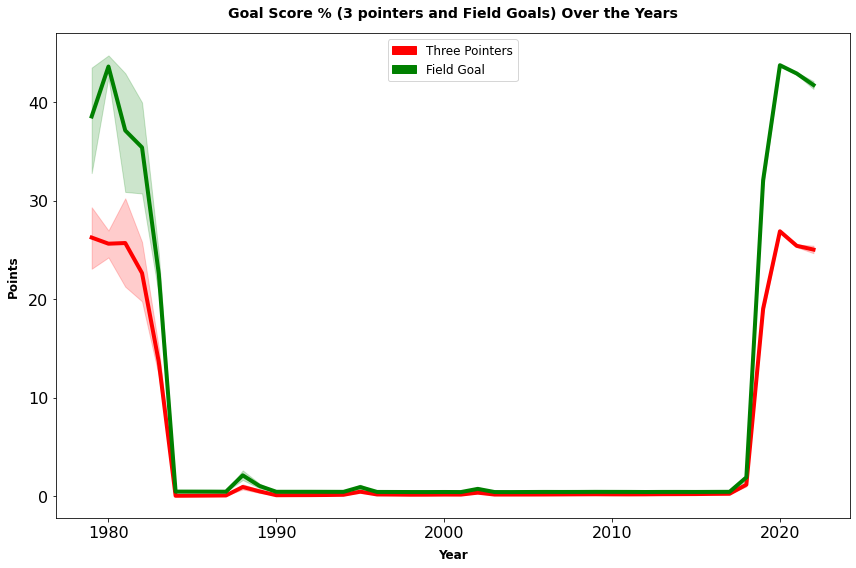

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=stats, x='game.season', y='home_fg3_pct', ax=ax, color='r', linewidth=4)
sns.lineplot(data=stats, x='game.season', y='home_fg_pct', ax=ax, color='g', linewidth=4)

ax.set_title('Goal Score % (3 pointers and Field Goals) Over the Years', fontsize=14, pad=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, labelpad=8, fontweight='bold')
ax.set_ylabel('Points', fontsize=12, labelpad=8, fontweight='bold')

red_patch = mpatches.Patch(color='r', label='Three Pointers')
green_patch = mpatches.Patch(color='g', label='Field Goal')
ax.legend(handles=[red_patch, green_patch], fontsize='large')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()